# Binary Search Tree. HW 5.4

Last Updated: June 10, 2022

**INSTRUCTIONS**

Below is code for a Binary Search Tree Class. Seven of the methods in this implementation are incomplete (vacuous): `find`, `size`, `preorder`, `inorder`, `postorder`, \_\_str\_\_ and `height`. It is your task to complete them. Use the testing code to test and confirm your implementation. Submit the completed notebook file (BOTH the .ipynb and a rendered .html).

**Note:** Finding the height of a binary tree is a common tech interview question.

**POINT VALUES: (TOTAL=10)**  

| method| points |
| :----| ---- |
| find | 2   |
| size | 1   |
| inorder | 2   |
| preorder | 1   |
| postorder | 1   |
| str | 2   |
| height | 1  |

---

**ABOUT THE CLASSES**

The `Node` class describes the structure of a node in the tree: each node has a data item and can have a left and right child.

The `BinarySearchTree` class is responsible for tree-level methods such as `buildBST`, inserting a data value in the right place/node in the BST tree (we populate the tree given a list data values through main), and the tree traversal methods.

---

In [1]:
# -*- coding: utf-8 -*-
"""
Binary Search Tree
Plus tree traversal methods

NOTE: I placed return statements immediately after the function declarations so
you can run the code and see the print statments before beginning the assignment.
HOWEVER ... You will need to move the return statements to the end of the functions
once you complete each function implementation :)
"""
import matplotlib.pyplot as plt
import networkx as nx


class Node:
      next_ID = 0

      def __init__(self, data): # Constructor of Node class
            # A node has a data value, a left child node and a right child node
          self.data = data  # data item
          self.left = None  # left child, initially None
          self.right = None # right child, initially None
          self.id = Node.next_ID
          Node.next_ID += 1


      def __str__(self): # Printing a node

          return str(self.data) # return as string

# ===================================================================
# ===================================================================

class BinarySearchTree:

      def __init__(self): # Constructor of BinarySearchTree class

          self.root = None  # Initially, None
          self.number_of_nodes = 0
          self.list_of_edges = []

# ===================================================================
      def buildBST(self, val):  # Build ("create") a binary search tree

          if self.root == None:

             self.root = Node(val)

          else:

             current = self.root

             while True:

                 if val < current.data:

                   if current.left:
                      current = current.left  # Go left...
                   else:
                      current.left = Node(val)  # Left child is None; place value here
                      self.list_of_edges.append((current, current.left))
                      break;

                 elif val > current.data:

                    if current.right:
                       current = current.right  # Go right...
                    else:
                       current.right = Node(val)  # Right child is None; place value here
                       self.list_of_edges.append((current, current.right))
                       break;

                 else:
                    break

          self.number_of_nodes += 1


# ===================================================================

      def find(self, target: int) -> bool:  # Find a node with the 'target' value in the BST
        '''
        returns true if found, false otherwise
        '''
        current_node = self.root
        while current_node != None:
            if target == current_node.data:
                return True
            current_node = current_node.left if target < current_node.data else current_node.right
        return False

# ===================================================================
      def size(self, node): # Counts the number of nodes in the BST
          '''
          returns number of nodes
          '''
          return self.number_of_nodes

      def count_nodes(self, node):
          return self.help_count_nodes(node)

      def help_count_nodes(self, node: Node | None) -> int:
          if node is None:
              return 0
          return 1 + self.help_count_nodes(node.left) + self.help_count_nodes(node.right)

# ===================================================================
      def inorder(self, node): # Performing in-order tree traversal
          '''
          prints values as encountered inorder
          '''
          visit_order_by_ID = []
          visit_order_by_value = []

          def help_conduct_depth_first_search_in_order(node):
              if not node:
                  return None
              help_conduct_depth_first_search_in_order(node.left)
              visit_order_by_ID.append(node.id)
              visit_order_by_value.append(node.data)
              help_conduct_depth_first_search_in_order(node.right)

          help_conduct_depth_first_search_in_order(self.root)
          print(f"DFS in order visit order by ID: {visit_order_by_ID}")
          print(f"DFS in order visit order by value: {visit_order_by_value}")

# ===================================================================
      def preorder(self, node): # Performing pre-order tree traversal
          '''
          prints values as encountered preorder
          '''
          visit_order_by_ID = []
          visit_order_by_value = []

          def help_conduct_depth_first_search_pre_order(node):
              if not node:
                  return None
              visit_order_by_ID.append(node.id)
              visit_order_by_value.append(node.data)
              help_conduct_depth_first_search_pre_order(node.left)
              help_conduct_depth_first_search_pre_order(node.right)

          help_conduct_depth_first_search_pre_order(self.root)
          print(f"DFS pre order visit order by ID: {visit_order_by_ID}")
          print(f"DFS pre order visit order by value: {visit_order_by_value}")

# ===================================================================
      def postorder(self, node):  # Performing post-order tree traversal
          '''
          prints values as encountered postorder
          '''
          visit_order_by_ID = []
          visit_order_by_value = []

          def help_conduct_depth_first_search_post_order(node):
              if not node:
                  return None
              help_conduct_depth_first_search_post_order(node.left)
              help_conduct_depth_first_search_post_order(node.right)
              visit_order_by_ID.append(node.id)
              visit_order_by_value.append(node.data)

          help_conduct_depth_first_search_post_order(self.root)
          print(f"DFS pre order visit order by ID: {visit_order_by_ID}")
          print(f"DFS pre order visit order by value: {visit_order_by_value}")

# ===================================================================
      def __str__(self): # "See Graph Diagram in Figure\n"
          '''
            Builds networkx visualization of the BST

            The purpose of this method is to render a visualization of a constructed BST
            Tree to confirm correctness.

            Hint: To complete this you will need to create a node list, edge list, and/or
            an adjacency matrix. You can then easily construct a graph visualization using networkx.

            Slightly alter one of your traversal methods (or the buildBST method)
            above so that the appropriate structure(s) is constructed and saved as
            an attribute(s) to the BST class, eg, edgeList.

            Hint: Use a directed graph (DiGraph) so you can more easily
            identify the root, leaf, and internal nodes. The standard networkx method
            draw will suffice. It will render the tree as a standard graph (ie no clear root),
            but you can determine which node is the root if you use a DiGraph.

            Once the graph is constructed, a plot is created.
          '''

          # Revisit previous exercises and examples using Networkx to help!
          # See docs here to help https://networkx.org/documentation/stable/tutorial.html
          # Insert Code to diplay figure here

          if self.root is None:
              return "<empty Binary Search Tree>"

          digraph = nx.DiGraph()
          digraph.add_edges_from(self.list_of_edges)

          dictionary_of_nodes_and_positions = {}

          def add_tuple_of_positions_of_node(
              node,
              negative_height,
              normalized_position_of_left_edge_of_zone_of_node,
              normalized_position_of_right_edge_of_zone_of_node
            ):
              if node is None:
                  return
              horizontal_position_of_node = (normalized_position_of_left_edge_of_zone_of_node + normalized_position_of_right_edge_of_zone_of_node) / 2.0
              dictionary_of_nodes_and_positions[node] = (horizontal_position_of_node, negative_height)
              add_tuple_of_positions_of_node(node.left,  negative_height - 1, normalized_position_of_left_edge_of_zone_of_node, horizontal_position_of_node)
              add_tuple_of_positions_of_node(node.right, negative_height - 1, horizontal_position_of_node, normalized_position_of_right_edge_of_zone_of_node)

          add_tuple_of_positions_of_node(
              node = self.root,
              negative_height = 0,
              normalized_position_of_left_edge_of_zone_of_node = 0.0,
              normalized_position_of_right_edge_of_zone_of_node = 1.0
          )

          dictionary_of_nodes_and_labels = {node: f"{node.id}: {node.data}" for node in digraph.nodes()}

          nx.draw(
              digraph,
              dictionary_of_nodes_and_positions,
              labels = dictionary_of_nodes_and_labels,
              with_labels = True,
              node_size = 1_000
          )
          plt.title("Binary Search Tree")
          plt.show()

          return f"See above Binary Search Tree."

# ===================================================================
      def height(self, node): # Performing post-order tree traversal
          '''
          prints tree height
          '''
          if node is None:
              node = self.root

          def help_determine_height(current_node) -> int:
              if current_node is None:
                  return -1
              return 1 + max(help_determine_height(current_node.left), help_determine_height(current_node.right))

          height = help_determine_height(node)
          print(height)
          return height

# ===================================================================


What's the size of the tree?
9
9
What's the size of the tree?
0
0

In-order Tree Traversal:
DFS in order visit order by ID: [2, 1, 4, 3, 5, 0, 6, 8, 7]
DFS in order visit order by value: [1, 3, 4, 6, 7, 8, 10, 13, 14]

Pre-order Tree Traversal:
DFS pre order visit order by ID: [0, 1, 2, 3, 4, 5, 6, 7, 8]
DFS pre order visit order by value: [8, 3, 1, 6, 4, 7, 10, 14, 13]

Post-order Tree Traversal:
DFS pre order visit order by ID: [2, 4, 5, 3, 1, 8, 7, 6, 0]
DFS pre order visit order by value: [1, 4, 7, 6, 3, 13, 14, 10, 8]

Find 7: True
Find 5: False
Find 30: False


Display Figure of Tree:


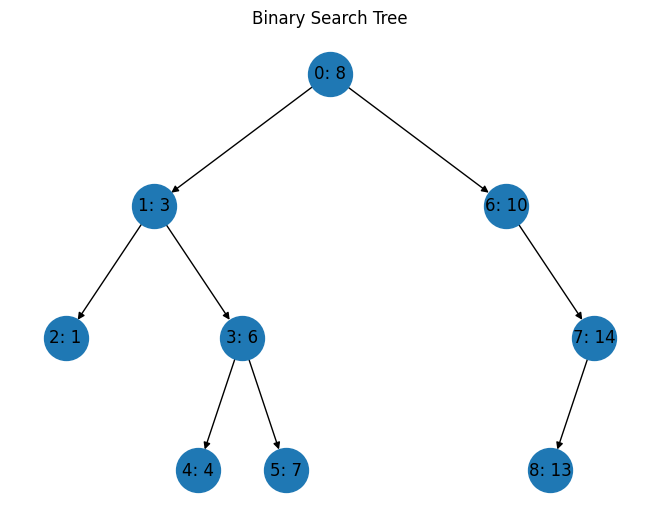

See above Binary Search Tree.

Height of the Tree:
3
3


In [2]:
##################
## Testing Code ##
##################

tree = BinarySearchTree()
treeEmpty = BinarySearchTree()  # Empty tree

arr = [8, 3, 1, 6, 4, 7, 10, 14, 13]    # Array of nodes (data items)
for i in arr:                   # For each data item, build the Binary Search Tree
    tree.buildBST(i)

print('What\'s the size of the tree?')
print(tree.size(tree.root))     # size method
print(tree.count_nodes(tree.root))

print('What\'s the size of the tree?')
print(treeEmpty.size(treeEmpty.root))
print(treeEmpty.count_nodes(treeEmpty.root))

print("")
print ('In-order Tree Traversal:')
tree.inorder(tree.root)         # Perform in-order tree traversal, and print

print("")
print ('Pre-order Tree Traversal:')
tree.preorder(tree.root)        # Perform pre-order tree traversal, and print

print("")
print ('Post-order Tree Traversal:')
tree.postorder(tree.root)       # Perform post-order tree traversal, and print

print("")
print ('Find 7:', end=" ")      # find method
print(tree.find(7))

print('Find 5:', end=" ")
print(tree.find(5))

print('Find 30:', end=" ")
print(tree.find(30))

print("")
print("")
print ('Display Figure of Tree:')
print(tree)

print("")
print('Height of the Tree:')
print(tree.height(tree.root))